### **K- Means Clustering**

This notebook will walk through some of the basics of K-Means Clustering. <br>
Goals: From the given ‘Iris’ dataset, predict the optimum number of clusters and
represent it visually.

Datasets: https://bit.ly/3kXTdox

**Author : Renaldy Dwi Nugraha**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
# Importing libraries in Python
import pandas as pd
import numpy as np

# Forming the iris dataframe
# I do prefer to download the datasets and import it as my datasets since the "Species" column does not present if I use this below code script: 
# pd.DataFrame(iris.data, columns = iris.feature_names)

df=pd.read_csv("../Iris.csv", index_col=0)
print(df.head(5))


    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
Id                                                                       
1             5.1           3.5            1.4           0.2  Iris-setosa
2             4.9           3.0            1.4           0.2  Iris-setosa
3             4.7           3.2            1.3           0.2  Iris-setosa
4             4.6           3.1            1.5           0.2  Iris-setosa
5             5.0           3.6            1.4           0.2  Iris-setosa


In [3]:
print('datasets shape:',df.shape)

datasets shape: (150, 5)


In [4]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# check the NaN data
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

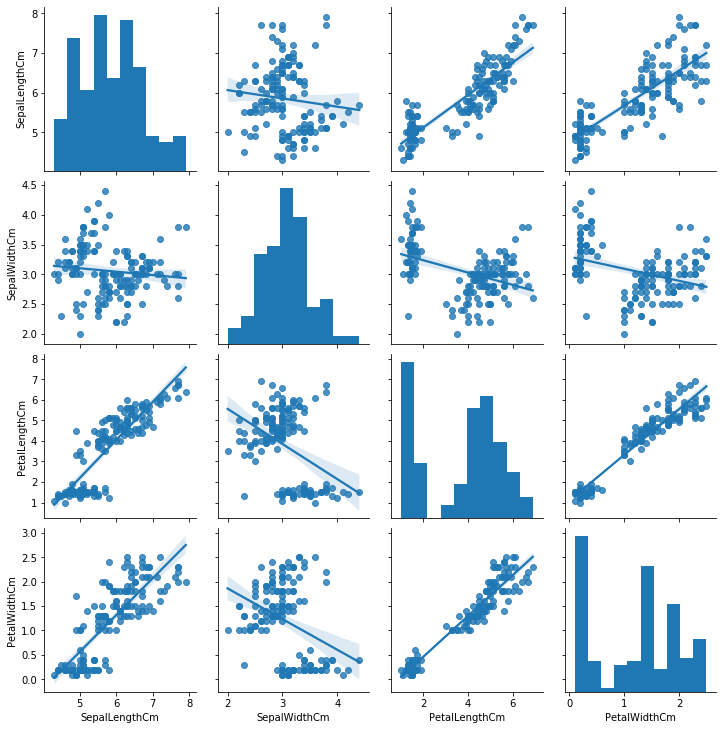

In [6]:
sns.pairplot(df, kind='reg')

### Finding the optimum number of clusters for k-means classification

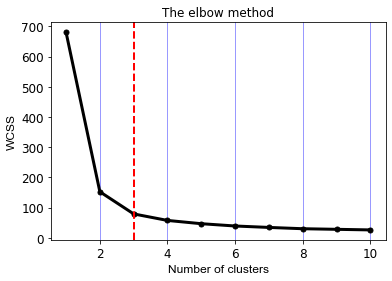

In [7]:
 x = df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss, linewidth = 3, color = 'black', marker='o', markersize=5)
plt.title('The elbow method')
plt.xlabel('Number of clusters', family='Arial', fontsize=12, color='black')
plt.ylabel('WCSS', family='Arial', fontsize=12, color='black') # Within cluster sum of squares
plt.xticks(fontsize = 12, color='black')
plt.yticks(fontsize = 12, color='black')
plt.grid(which='both', color='blue', axis='x', alpha=0.5)
#plt.show()

number_of_clusters = 3 #defined it after check the elbow
_=plt.axvline(x=number_of_clusters, linewidth=2, color = 'red', linestyle='--')
_=plt.show()

**Elbow method**
The optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

Therefore, the number of cluster is **3**

In [8]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

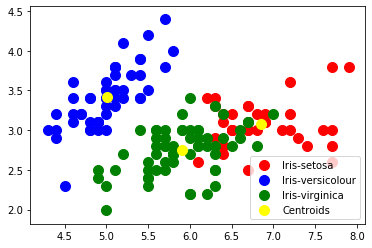

In [9]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()